# INFO 2950 Final Project

## Introduction

As social media becomes ever more prevalent in our lives, there has been a need for institutions to carve out an online presence. Universities are no exception to this, and the overwhelming majority of colleges have their own Instagram accounts in 2020. But how much do these Instagram accounts reflect the schools behind them? We sought to answer questions like this by analyzing the Instagram followers/following/post counts of around 70 universities, relating them to institutional attributes such as student body size and acceptance rate.

### Research Question
*Do attributes of four-year colleges and universities in the U.S. such as size, admission rate, and household income relate to the corresponding Instagram accounts' number of followers, following, and posts?*

At a glance, our research question may not seem to have important implications. However, finding a link between social media and collegiate-level institutions can provide insights into online psychology and real-world perceptions of such institutions. For example, could Instagram follower counts affect an applicant's perspective? Could the rate of follower growth impact an institution's national standing? Outside of this project, it might also be interesting to look at factors that can change more easily, such as post content and university policies. Would changing post writing/designs influence student demographics? Would adjusting a financial aid policy bring in more Instagram activity? These are just a few examples of applications this kind of research leads to.

In our analysis, we explored Instagram statistics that we collected ourselves over the past year, along with college properties from the Department of Education's College Scorecard Project. We then combined the two datasets and ran regression models to see if we could predict Instagram statistics from college properties, and college properties from their Instagram statistics.

We did not find strong relationships between any one of the properties and statistics. Even when we used many predictors in our multivariate linear regression, we were only able to account for a moderate amount of variability in the number of Instagram followers. Our logistic regressions categorizing the properties of universities based on their Instagram statistics were sometimes more accurate than guessing. However, while there may be some relationship between Instagram statistics and college properties, we found that our results were not significant with our sample size.

## Data Description

Our three main datasets are Instagram Data, Scorecard Data, and Merged Data, with merged data being a combination of the two aforementioned datasets.

### Instagram Data
Instagram data was collected per-university. For every university, there is a table of observations with rows being timestamped days from the past year and columns being the number of followers, following, and posts on the university's Instagram page. A visualization can be found in the appendix (p2).

This dataset was created by Changyuan (see Contributors) as a personal project starting last year, and has been autonomously collecting data ever since.

This data collection was not funded by anyone.

The 70 Instagram accounts tracked were chosen by hand, so they are not necessarily representative of all universities. During certain time intervals, data was missing due to rate limiting or unexpected modifications to the structure of the scraped website (see Limitations).

No preprocessing was done before the data was received and cleaned for this project.

No data was collected on accounts belonging to individual people, only institutions.

Raw data is available in the source code (below) in the data folder.

First 4 lines of `cornelluniversity.csv`:
```
date,followers,following,posts
2019-09-08 15:42:32.026749,190500,160,1773
2019-09-09 12:00:03.187746,190700,160,1774
2019-09-10 12:00:02.818769,190900,160,1775
```

### Scorecard Data
Scorecard data contains universities and their attributes. The rows are universities. The columns are admission rate, SAT score, cost of attendance, average income, median income, size of student population, latitude, longitude, city, name, ownership (private/public), region, state, locale type, and locale size. A visualization can be found in the appendix (p2).

More attributes are present in the full dataset, which was assembled by the U.S. Department of Education as part of the College Scorecard Project. The College Scorecard Project is designed to increase transparency and help students and families compare postsecondary institutions.

This data collection was funded by the U.S. government.

The data originates from federal reporting from institutions, data on federal financial aid, and tax information, reported to the Integrated Postsecondary Education Data System (IPEDS). This could affect what data is recorded, or the accuracy of the data.

For many elements, data is processed and pooled across multiple years to reduce year to year variation in figures.

Student-level data comes from the universities themselves or through recipients of federal student aid, who are likely aware that their anonymized statistics will be included as part of the institution's records.

The raw College Scorecard data used in this project can be found at https://collegescorecard.ed.gov/data/. Thanks to the government for compiling this data and making it publicly available! :)

First 2 lines of `scorecard.csv`:
```
admission_rate,sat_score,cost_attendance,income_avg,income_med,size,lat,lon,city,name,ownership,region,state,locale_type,locale_size
0.6126,1125.0,46026.0,66334.0,49741.0,1918.0,39.842612,-88.976298,Decatur,Millikin University,private non-profit,great lakes,IL,city,small
```

### Merged Data
Merged data is a combination of the Instagram Data and Scorecard Data. It is a smaller dataset, as it only contains the subset of universities that we collected Instagram data for over the past year. 

All universities that were scraped are present in the Scorecard data. Since Instagram data exists by university, attribute, and time, we had to drop one to reasonably fit inside a 2D dataframe. As such, the data points for each university over the course of a year were compressed into their latest values and summary statistics. 

Merged data contains all columns in the Scorecard Data, plus columns for current and summary statistics of followers, following, and post count. The merged data only contains rows/observations for universities that we were able to map an Instagram account that we collected data to.

This dataset was created solely for the project. It was not funded by anyone. The other questions in Gebru et al, 2018 sections 3.1-3.5 were answered in the sections above.

This final version of the cleaned data is in the source code (below) as instagram_details.csv.

First 2 lines of `instagram-details.csv`:
```
instagram,follower_curr,follower_mean,follower_med,follower_std,follower_min,follower_max,following_curr,following_mean,following_med,following_std,following_min,following_max,posts_curr,posts_mean,posts_med,posts_std,posts_min,posts_max,name,id,admission_rate,sat_score,cost_attendance,net_price_private,net_price_public,income_avg,income_med,size,lat,lon,carnegie_size_setting,carnegie_undergrad,city,locale,ownership,region,state,zip,locale_type,locale_size

amherstcollege,17700.0,15826.912928759895,15600.0,934.7289567341286,14200.0,17700.0,650.0,636.0343007915567,636.0,12.17145525352865,617.0,655.0,2043.0,1964.8416886543537,1960.0,46.55475530582614,1886.0,2043.0,Amherst College,164465.0,0.12810000000000002,1449.0,71300.0,25208.0,,78988.0,42053.0,1855.0,42.372459,-72.518493,11.0,14.0,Amherst,21.0,private non-profit,new england,MA,01002-5000,suburb,large
```

## Preregistration Statement

These are the our two pre-registrations of analysis, and why we chose them.

1. We want to find if there is a relationship between university attributes and their Instagram statistics. If a relationship exists, how strong is it? How accurately could we predict a university's follower count if we only knew certain attributes of the institution? To figure this out, we will *perform linear regression on Instagram data vs college stats to see if there is a linear relationship. Specifically, follower count and follower percent increase vs. size and admission rate.* If there is a correlation, then there may be some relationship between how many followers a university has and their size or admission rate. It would also be interesting if there was no relationship found because intuitively, a university with a larger student body would have more followers. Similarly, institutions with lower admission rates have more applicants than spots, which means they are very popular, and popular handles on Instagram tend to have more followers.

2. We also want to see if certain categorial attributes of colleges help in predicting their Instagram statistics. Though numbers like admission rate and student body size may tell some part of the story, we can gain more insight by including non-numerical data. For example, we can examine if it's a public or private school, what region of the country it's located in, and what type of urban/suburban/rural environment it is situated in. To do this we will *perform linear regression on Instagram data vs categorical variables that we ignored before. Specifically, college ownership, region, and locale.* If the relationship is weak/nonexistent or adds little value to the model, this might be interesting for school ownership, as many private universities tend to be high-performing and popular. If there is a meaningful relationship, then region of the country and locale may influence follower count, which is unexpected.

## Data Analysis

In [1]:
import import_ipynb

### Exploration
Here are the most interesting findings from our data exploration!

In [18]:
import exploration

1. When plotting follower counts, we noticed that there was a slight dip around the end of March / beginning of April (consistently across different schools). We think that this is because of acceptance results coming out, and that most of the unfollows are from seniors who didn't get accepted (or got accepted to better schools).

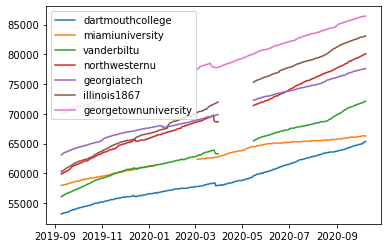

In [3]:
exploration.plot_follower_counts(exploration.follower_counts(7,34).name)

2. Johns Hopkins University had the most drastic follower percent increase, at over +100%. This may be due to JHU being a leader in publicizing COVID data. Their follower count shot up starting in March, which coincidentally lines up with a shift in their Instagram posts' aesthetic to stress-relieving pictures (starting after [this post](https://www.instagram.com/p/B-FlWBFhSrk/)).

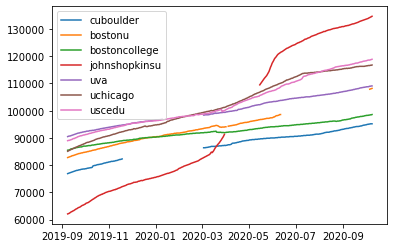

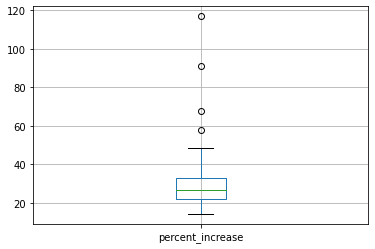

,name,percent_increase
0,johnshopkinsu,116.908213
1,ivyleague,91.029024
2,csupueblo,67.772778
3,mitpics,57.698210
4,claremontmckennacollege,48.369036


In [4]:
exploration.plot_follower_counts(exploration.follower_counts(7,42).name)
exploration.plt.show()
exploration.follower_increase.boxplot()
exploration.plt.show()
exploration.follower_increase.head()

3. In the merged dataset, we found a medium correlation between follower median and college size. This led us to focus on those variables as predictors and outputs for our regression models.

Correlation between median income and SAT score: 0.56


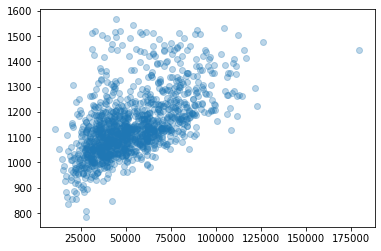

In [5]:
print("Correlation between median income and SAT score: {:.2f}".format(exploration.income_med.corr(exploration.sat_score)))
exploration.plt.scatter(exploration.income_med, exploration.sat_score, alpha=0.3)
exploration.plt.show()

More comprehensive analysis can be found in phase2.ipynb and phase2-exploration.ipynb in the appendix. 

### Linear Regression
Here are the most interesting findings from our linear regressions!

In [19]:
import linear

1. Individually, institutional properties don't have much correlation with Instagram statistics. Combining them, however, gives a better picture of their Instagram counts but doesn't explain everything. The opposite direction using followers/following/post counts on individual properties isn't great either.

2. Removing Harvard, Standford, and Yale improve the $r^2$ values obtained from linear regressions, particularly when the log of followers was not taken.

3. Follower percent increase is incredibly hard to predict, even using a large number of predictors. This could mean that follower percent increase is completely unrelated to all the predictor variables.

More comprehensive analysis can be found in [phase4-linear.ipynb](./phase4-linear.ipynb).

### Logistic Regression
Here are the most interesting findings from our logistic regressions!

In [20]:
import logistic

1. It seems like the follower data might be able to predict a school's admission rate and whether or not it's in a city, but not student family income or cost of attendance. The percent accuracy for the former outcome variables were consistently higher than 50%.

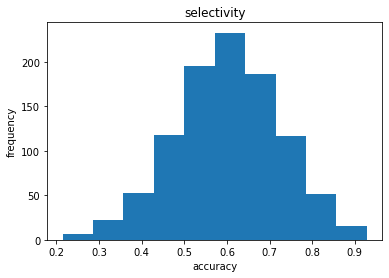

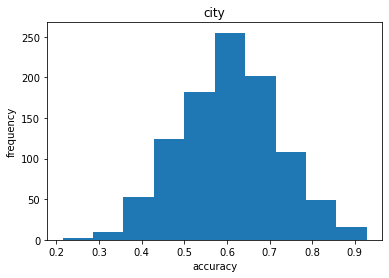

In [13]:
logistic.plot_accuracies(logistic.selectivity_accuracies, "selectivity")
logistic.plot_accuracies(logistic.city_accuracies, "city")

2. Removing Harvard, Stanford, and Yale did not really affect the model scores. This might be because Harvard, Stanford, and Yale are outliers with respect to popularity and Instagram data, but not institutional data. So our models might be able to predict outcomes for those schools with the same accuracy as the other institutions.

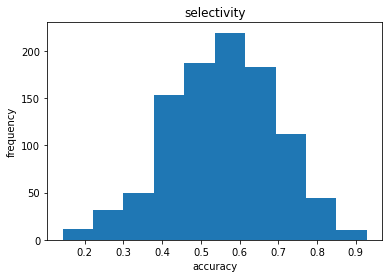

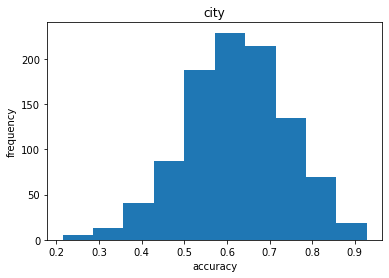

In [12]:
logistic.plot_accuracies(logistic.filtered_selectivity_accuracies, "selectivity")
logistic.plot_accuracies(logistic.filtered_city_accuracies, "city")

More comprehensive analysis can be found in [phase4-logistic.ipynb](./phase4-logistic.ipynb).

## Evaluation of Significance

We found our findings from our regression models to be mostly insignificant. The p-values we calculated were too large, so we could not reject the null hypotheses. This may be because there is no relationship between Instagram statistics and institution data, or because our sample size was too small.

The exception was for size as a predictor in our linear models. However, since the other variables in the multivariable linear regressions had high p-values, so there might be interdependencies that invalidate the significance of institution size.

In [10]:
for i in range(linear.m):
    print(linear.predictors.columns[i], "p-value:", linear.follower_med_pvalue[i])

size p-value: 0.007
admission_rate p-value: 0.918
income_med p-value: 0.905
cost_attendance p-value: 0.749
is_private p-value: 0.303
locale_type_num p-value: 0.241
locale_size_num p-value: 0.581
sat_score p-value: 0.258
far west p-value: 0.86
great lakes p-value: 0.174
mid east p-value: 0.143
new england p-value: 0.344
plains p-value: 0.59
rocky mountains p-value: 0.122
southeast p-value: 0.832
southwest p-value: 0.925


In [17]:
print("Predictors:", logistic.binary_data_predictors.columns.to_list())
print("Selectivity p-values:", logistic.selectivity_pvalues)
print("Income p-values:", logistic.income_pvalues)
print("Cost p-values:", logistic.cost_pvalues)
print("City p-values:", logistic.city_pvalues)

Predictors: ['follower_curr', 'follower_mean', 'follower_med', 'follower_std', 'follower_max', 'follower_min']
Selectivity p-values: [0.458 0.894 0.16  0.207 0.458 0.073]
Income p-values: [0.614 0.094 0.903 0.911 0.614 0.891]
Cost p-values: [0.123 0.193 0.828 0.948 0.123 0.902]
City p-values: [0.775 0.159 0.77  0.367 0.775 0.816]


More comprehensive significance evaluation can be found at the ends of [phase4-linear.ipynb](./phase4-linear.ipynb) and [phase4-logistic.ipynb](./phase4-logistic.ipynb).

## Interpretation and Conclusions

For the multivariate linear regression, we found that it is possible to somewhat accurately predict a college's number of Instagram followers using a combination of their size, admission rate, median income, cost of attendance, private/public, locale type, locale size, SAT score, and region. Naturally, adding more predictors improves the model's score, giving us a final $r^2$ of 0.609. This score from including all of the above predictors and taking out a few extreme universities still indicates that all of this data cannot explain the variability among colleges in Instagram activity. Our data can only explain so much, as social media is very complex. Predicting college properties from Instagram statistics yielded low $r^2$ values as well, so there is not much of a relationship. The $r^2$ when predicting follower percent increase, however, was extremely close to 0 even with many predictors. This might indicate that the growth rate of an account has no relation to the college's attributes.

Trying to predict what categories a university would fall into from logistic regression on their Instagram statistics did not yield significant results. We used the current, average, median, min, max, and standard deviation of followers for universities over the past year to predict if a university would have an above-median admission rate, above-median median income, above-median cost of attendance, and if the university would be located in a city. Running many iterations with training and test sets, we found that the median accuracies from the regressions were close to guessing and not as high as we expected. When we ran permutations of the output values on the data and tested logistic regressions on them, we didn't find any predictor whose p-value was lower than a critical value of 0.05 either. So, we concluded that our logistic regression results were not significant.

If we were to repeat this experiment, we would gather Instagram data for multiple years in order to see if there are any differences in Instagram trends year over year. Since we only have one year and no other years to compare against, we couldn't distinguish seasonal patterns from the effects of the coronavirus pandemic without our own speculation. In addition, having rankings or some other measure of popularity would be interesting, as we think that the number of followers is likely related to how popular a university is. It would also have been interesting to look at how post frequency related to follower count. In the real world, colleges might use information about their Instagram accounts to optimize how to interact with their community and potential students. If there is a significant relationship, social media may be an important factor in an individual's decision to choose their college/university.

## Limitations

### Instagram Data
1. We have chunks of missing or corrupt data. We think this is due to Instagram's rate limiting, and mishandling of rate-limiting errors when collecting this data, or changes to Instagram's website that persisted for a period of time and were then removed. This can be observed in the data exploration graphs. We dealt with this (particularly range and rate of change) by recently scraping more data and ensuring that the beginning and ending dates had fully populated entries.
2. The Instagram handles are handpicked by Changyuan, and is thus not comprehensive. It is not necessarily representative of all types of colleges/universities in the U.S. For example, there tends to be more Colorado schools (where Changyuan is from).
3. The scope of this dataset is extremely narrow because they were handpicked by Changyuan. Unfortunately, we couldn't find any equivalent/similar datasets online. This makes our data unique but limited in sample size.
4. We collected data on general statistics, but didn't collect any data on post content. That was outside the scope of this project, but could lead to some interesting findings (with sentiment analysis or examining the effect of singular posts on follower counts).
5. Instagram statistics are not as granular as we would've liked (eg. `k` to denote thousand and `m` to denote million). As a result, there is some stepping that can be observed in the graphs (especially for Harvard and other Instagram accounts with high follower counts). If we were to do this again, we would either scrape from a third-party site (like https://instastatistics.com/) or scrape HTML tag metadata instead of the text.
6. Our dataset is 3-dimensional: Instagram handle, statistics, time. As a result, there is some information loss when collapsing it to 2D. In this phase, we chose to collapse statistics and time into one variable: summary statistics over time. This can be observed in the exploratory data analysis for our merged dataset. An alternative approach, as suggested by our mentor William, would be to use [other dimensionality reduction techniques](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/). We decided against this since it was outside the scope of the class and would take more time than we had to understand everything from scratch.

### Scorecard Data
1. This dataset is massive, so it had to be heavily filtered. Many columns that we deemed irrelevant were dropped. We also filtered the dataset down to four-year colleges. This limitation caused us to change our research question to be more specific.
2. The data is provided by the Department of Education, and comes with some other limitations mentioned in Data Description (above). For example, improper reporting could lead to inaccurate data. Also, the Secretary of Education may introduce partisan bias into the kind of data being collected.

### Data Analysis and Evaluation of Significance
1. What we decided to show in the final project, as well as what we decided to explore (eg. which predictor/outcome variables), are all subject to our biases as data scientists. Our primary goal was to find something interesting (significant or not), which is entirely subjective and could have led to some personal bias in our analysis.
2. Our sample size is extremely small (~70 institutions) compared to what our project is attempting to generalize to (four-year colleges and universities in the U.S.). So all our findings, including insignificance, should be taken with a grain of salt.

## Source Code

https://github.coecis.cornell.edu/bfs45/info2950-project

## Acknowledgments

### Contributors
Benjamin Shen (bfs45)  
Changyuan Lin (cl859)  

Larina Fu (lrf59) - Phases 0,1  
William Jacob Bekerman (wjb239) - TA Mentor  

Additional thanks to all our peers that gave feedback on this project!